## Binomial logistic regression (Part 1)

Throughout the following exercises, We will learn to use Python to build and evaluate a binomial logistic regression model.
Throughout the course, we will be using pandas and sickit-learn for operations, and seaborn for plotting.

In [4]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

**Exploratory data analysis**

In [5]:
# import csv file
activity_data = pd.read_csv('activity.csv')
activity_data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [6]:
# Get the summary statistics
activity_data.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


**Construct binomial logistic regression model**
For binomial logistic regression, we'll be using the scikit-learn package, which is frequently used for machine learning and more advanced data science topics. For the purposes of this exercise, we'll only load in the functions we need: train_test_split() and LogisticRegression().

In [8]:
!mamba install scikit-learn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, seaborn, scikit-learn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.8677000000476837 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.2.0                         py313h33caa6c_0               emscripten-forge              
+ certifi                       2026.1.4                      pyhd8ed1ab_0                  conda-forge                   
+ charset-normalizer            3.4.4                         pyhd8ed1ab_0                  conda-forge                   
+ idna                          3.11                          pyhd8ed1ab_0                  conda-forge                   
+ joblib                    

In [9]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Then, we'll save the data into variables called X and y so we can use the train_test_split() function more easily.

In [29]:
X = activity_data[['Acc (vertical)']]
y = activity_data[['LyingDown']]

Then we'll split the data into training and holdout datasets. We set the test_size to 0.3 so that the holdout dataset is only 30% of the total data we have. We'll set the random_state equal to 42. If you change this variable, then your results will be different from ours. Setting the random_state is mainly for reproducibility purposes.

In [17]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Then we'll build our classifier, and fit the model to the data by using the .fit() function. We'll save the fitted model as a variable called clf.

In [18]:
clf = LogisticRegression().fit(X_train,y_train )

**Get coefficients and visualize model**
We can use the coef_ and intercept_ attributes of the clf object to get the coefficient and intercept of our model.

In [19]:
# Get the coefficient
clf.coef_

array([[-0.1177471]])

In [20]:
# Get the intercept
clf.intercept_

array([6.10180958])

So, based on what we've found, our model has an intercept or 
$beta_0$ of 6.10 and a $beta_1$ of -0.12. Now we can plot our model and data with a 95% confidence band using the regplot() function from the seaborn package. Remember to set the argument logistic=True so that the function knows we are plotting a **logistic regression model**, not a linear regression model.

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

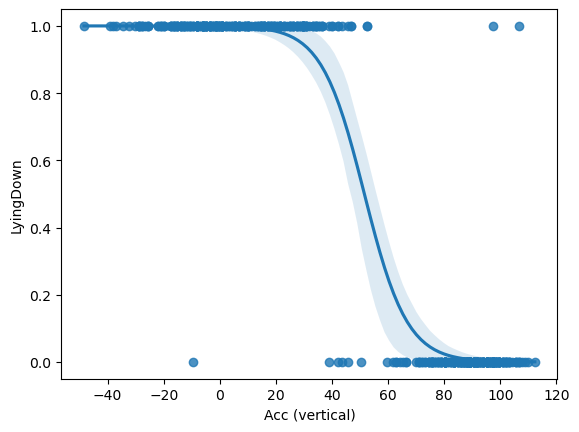

In [21]:
#Plot the logistic expression and its confidence band
sns.regplot (x = "Acc (vertical)" , 
             y = "LyingDown",
             data = activity_data,
             logistic = True)


**Confusion matrix (Part II)**
This part of the notebook contains all of the code that will be presented in the second part of this section in the course. The focus is on confusion matrices, which are used to evaluate classification models, such as a binomial logistic regression model.

Once again, we split our data, which is currently saved as variables X and y, into training and holdout datasets using the train_test_split() function. The function has already been imported from the scikit-learn package. Then, we build the model by using the LogisticRegression() function with the .fit() function.

Next, we can save our model's predictions by inputting the holdout sample, X_test into the model's .predict() function.

In [38]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Build regression model
clf = LogisticRegression().fit(X_train,y_train)

#Save predictions
y_pred = clf.predict(X_test)


/lib/python3.13/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1
 1]


We can print out the predicted labels by just calling on clf.predict(X_test). Recall that 0 means not lying down, and 1 means lying down.

In [39]:
print(y_pred)

[0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1
 1]


But, the model actually calculates a probability that given a particular value of X, the person is lying down. We can print out the predicted probabilities with the following line of code. 

In binary classification, scikit‑learn orders classes alphabetically or numerically:

Code
classes_ = [0, 1]

column 0 → probability of class 0

column 1 → probability of class 1

-1 is a convenient way to always grab the positive class probability.

In [40]:
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

## Create confusion matrix

**Confusion matrix:** A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.
To create a confusion matrix, we'll use the confusion_matrix() function from the metrics module of scikit-learn. To use the function, we'll need to input the following:

1. Actual labels of the holdout sample, stored as y_test
2. Predicted labels of the holdout sample, stored as y_pred
3. The names of the labels, which you can access using clf.classes_
Note: If there were more classes, we would have more numbers or labels in clf.classes_. Since this is a binomial logistic regression, there are only two labels, 0 and 1.

In [41]:
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

In [43]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [44]:
# Create the confusion matrix as a visualization
viz = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

- The upper-left quadrant displays the number of true negatives.
- The bottom-left quadrant displays the number of false negatives.
- The upper-right quadrant displays the number of false positives.
- The bottom-right quadrant displays the number of true positives.
We can define the above bolded terms as follows in our given context:

- True negatives: The number of people that were not lying down that the model accurately predicted were not lying down.
- False negatives: The number of people that were lying down that the model inaccurately predicted were not lying down.
- False positives: The number of people that were not lying down that the model inaccurately predicted were lying down.
- True positives: The number of people that were lying down that the model accurately predicted were lying down.
A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

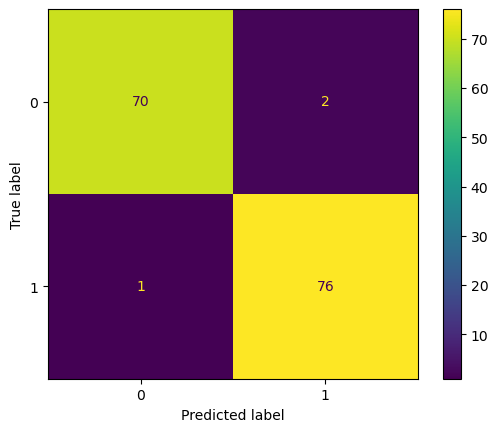

In [45]:
# Display the confusion matrix
viz.plot()

## Perform logistic regression

**Introduction**
In this activity, we will complete an effective bionomial logistic regression. This exercise will help to better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help to build confidence in practicing logistic regression.

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, we will practice the following skills:

Importing packages and loading data
Exploring the data and completing the cleaning process
Building a binomial logistic regression model
Evaluating a binomial logistic regression model using a confusion matrix

In [46]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#Load the datset
df_original = pd.read_csv('Invistico_Airline.csv')
df_original.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0,0.0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47.0,Personal Travel,Business,NaN,0,0.0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0,0.0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60.0,Personal Travel,Eco,623.0,0,0.0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,99.0,Personal Travel,NaN,354.0,0,0.0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Data exploration, data cleaning, and model preparation

**Prepare the data**
After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes:

1. Exploring the data
2. Checking for missing values
3. Encoding the data
4. Renaming a column
5. Creating the training and testing data

**Explore the data**

In [51]:
# check the data type of each column
df_original.dtypes

satisfaction                             str
Gender                                   str
Customer Type                            str
Age                                  float64
Type of Travel                           str
Class                                    str
Flight Distance                      float64
Seat comfort                           int64
Departure/Arrival time convenient    float64
Food and drink                         int64
Gate location                        float64
Inflight wifi service                float64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

**Check the number of satisfied customers in the dataset**
Use the value_counts() function. To examine how many NaN values there are, set the dropna parameter passed in to this function to False.

In [55]:
#check the number of 'satisfied' customer
df_original['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

**Question: How many satisfied and dissatisfied customers were there?**
Total of 71087 customers were satisfied and 58793 customers were dissatisfied
**Question: What percentage of customers were satisfied?**

54.7 percent (71,087/129,880) of customers were satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy.

**Check for missing values**
An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [63]:
df_original.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                         17
Age                                   16
Type of Travel                        17
Class                                 17
Flight Distance                       19
Seat comfort                           0
Departure/Arrival time convenient      4
Food and drink                         0
Gate location                          5
Inflight wifi service                  4
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [64]:
df_original.shape

(129880, 23)

**Question: Should you remove rows where the Arrival Delay in Minutes column has missing values, even though the airline is more interested in the inflight entertainment column?**

For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The Arrival Delay in Minutes column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.
This column might impact the relationship between entertainment and satisfaction.

In [65]:
##Drop the rows with missing values
df_subset = df_original.dropna(axis=0).reset_index(drop= True)

**Prepare the data**
If you want to create a plot (sns.regplot) of your model to visualize results later in the notebook, the independent variable Inflight entertainment cannot be "of type int" and the dependent variable satisfaction cannot be "of type object."

Make the Inflight entertainment column "of type float."

In [66]:
#change the data type of 'Inflight entertainment' column
df_subset = df_subset.astype({'Inflight entertainment' : float})

**Convert the categorical column satisfaction into numeric**
Convert the categorical column satisfaction into numeric through one-hot encoding.

Call OneHotEncoder(), specifying the drop argument as 'first' in order to remove redundant columns from the output.

Call .fit_transform(), passing in the subset of the data that you want to encode (the subset consisting of satisfaction).

Call .toarray() in order to convert the sparse matrix that .fit_transform() returns into an array.

Index df_subset with a double pair of square brackets to get a DataFrame that consists of just satisfaction.

After getting the encoded values, update the satisfaction column.

In [68]:
df_subset['satisfaction'] = OneHotEncoder(drop= 'first').fit_transform(df_subset[['satisfaction']]).toarray()


In [69]:
df_subset.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0,0.0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0,0.0,0,...,2,2,3,3,4,4,4,2,0,0.0
2,1.0,Female,Loyal Customer,60.0,Personal Travel,Eco,623.0,0,0.0,0,...,3,1,1,0,1,4,1,3,0,0.0
3,1.0,Male,Loyal Customer,30.0,Personal Travel,Eco,1894.0,0,0.0,0,...,2,2,5,4,5,5,4,2,0,0.0
4,1.0,Female,Loyal Customer,66.0,Personal Travel,Eco,227.0,0,0.0,0,...,5,5,5,0,5,5,5,3,17,15.0


**Create the training and testing data**
Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [71]:
# Create X and y dataframe
X = df_subset[['Inflight entertainment']]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


**Question: If you want to consider customer satisfaction with your model, should you train your model to use inflight entertainment as your sole independent variable?**

Other variables, like Departure Delay in Minutes seem like they can be potentially influential to customer satisfaction. This is why only using one independent variable might not be ideal.

**Model building**
Fit a LogisticRegression model to the data

In [72]:
#Build a logistic regression model and fit the model to the training data.
clf = LogisticRegression().fit(X_train,y_train)

**Obtain parameter estimates**

In [73]:
clf.intercept_

array([-3.21470588])

In [74]:
clf.coef_

array([[1.00427832]])

**Create a plot of your model**
Create a plot of your model to visualize results using the seaborn package.

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

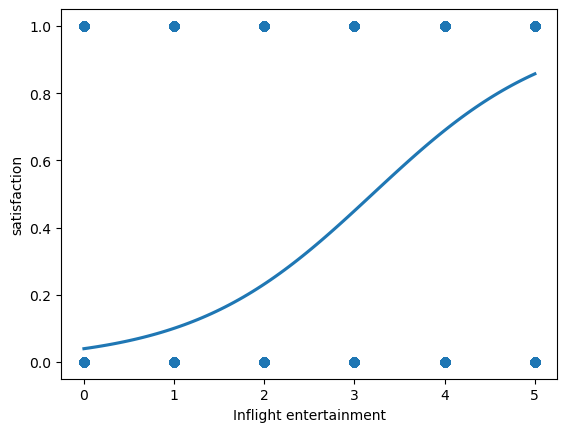

In [77]:
sns.regplot(x ="Inflight entertainment",
           y = "satisfaction",
           data= df_subset,
           logistic=True,
            ci= None
           )

**Question: What can you tell from the graph?**

The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

**Predict the outcome for the test dataset**
Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called y_pred.

In [78]:
y_pred = clf.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 1., 1.], shape=(38839,))

In [79]:
#Use the predict_proba and predict functions on X_test
clf.predict_proba(X_test)

array([[0.55029704, 0.44970296],
       [0.30951079, 0.69048921],
       [0.76961689, 0.23038311],
       ...,
       [0.76961689, 0.23038311],
       [0.14103916, 0.85896084],
       [0.30951079, 0.69048921]], shape=(38839, 2))

**Analyze the results**
Print out the model's accuracy, precision, recall, and F1 score.

In [85]:
#Input y_test and y_pred into the metrics.accuracy_score, metrics.precision_score, metrics.recall_score, and metrics.f1_score functions.
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.6f}')
print(f'Precision: {metrics.precision_score(y_test, y_pred):.6f}')
print(f'Recall: {metrics.recall_score(y_test, y_pred):.6f}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred):.6f}')
   

Accuracy: 0.801282
Precision: 0.814154
Recall: 0.823157
F1 Score: 0.818630


**Produce a confusion matrix**
Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

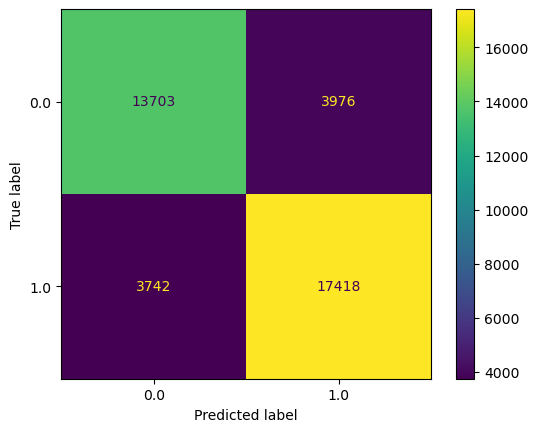

In [87]:
# create confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
viz = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
viz.plot()

**Question: What stands out to you about the confusion matrix?**

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives.

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

**Question: Did you notice any difference in the number of false positives or false negatives that the model produced?**

There isn't a large difference in the number of false positives and false negatives.

**Question: What do you think could be done to improve model performance?**

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

**Considerations**
**What are some key takeaways that you learned from this lab?**

A lot of machine learning workflows are about cleaning, encoding, and scaling data.
The approach you use to plot or graph your data may depend on the type of variable you are evaluating.
Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).
**What findings would you share with others?**

Logistic regression accurately predicted satisfaction 80.2 percent of the time.
The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.
**What would you recommend to stakeholders?**

- Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction.
- The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent.
- The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers.